In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re,datetime

In [25]:
df=pd.read_excel('转债时间序列.xlsx',index_col=0)[:-7]
df

,110031.SH,110034.SH,110045.SH,110048.SH,110051.SH,110055.SH,110056.SH,110057.SH,110058.SH,110060.SH,...,128123.SZ,128124.SZ,128125.SZ,128126.SZ,128127.SZ,128128.SZ,128129.SZ,128130.SZ,128131.SZ,128132.SZ
2017-09-18,105.2388,125.2293,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
2017-09-19,104.9560,124.5082,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
2017-09-20,105.0533,125.0671,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
2017-09-21,105.0205,124.8260,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
2017-09-22,104.5178,123.9149,--,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-09,110.3455,112.9567,98.6807,118.245,121.091,126.907,116.36,115.008,124.138,125.493,...,119.188,111.665,126.751,114.971,--,--,--,--,99.9975,--
2020-09-10,108.6411,112.7923,98.2785,117.673,120.48,126.985,115.159,114.497,124.447,123.802,...,119.537,110.963,126.653,115.07,--,--,--,--,99.9967,--
2020-09-11,109.0967,111.1679,98.3963,117.391,120.678,126.973,113.757,113.745,122.125,124.47,...,119.047,111.983,126.452,115.392,104.82,--,--,--,99.9959,--
2020-09-14,109.1136,111.8848,97.7597,116.346,121.883,126.747,113.073,113.571,122,126.567,...,119.431,111.46,126.448,115.667,105.236,--,--,--,99.9934,--


In [26]:
my_ind_bond=open('转债.txt').read().split('\n')[:-1]
my_ind_list=list(map(lambda x:x.split('  ')[0],my_ind_bond))
my_ind_list=set(df.columns.tolist()).intersection(set(my_ind_list))
df_ind=df.loc[:,my_ind_list]

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text xticklabel objects>)

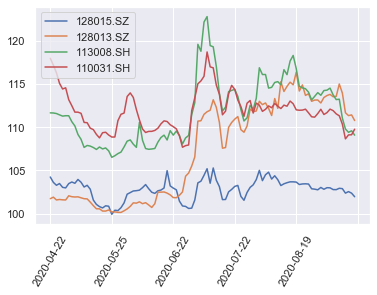

In [321]:
df_ind.replace('--',0,inplace=True)
df_ind
df_chg=(df_ind/df_ind.shift(1)-1)[1:]


df_ind.loc[:,df_chg.dropna(axis=1).columns.tolist()].iloc[-100:].plot()
plt.xticks(rotation=60)


In [313]:
df_chg.dropna(axis=1)

,128015.SZ,128013.SZ,113008.SH,110031.SH
2017-09-19,-0.012271,0.000189,0.000068,-0.002687
2017-09-20,0.002179,-0.000192,0.000909,0.000927
2017-09-21,-0.006987,-0.001720,0.001096,-0.000312
2017-09-22,0.001495,-0.003987,-0.005064,-0.004787
2017-09-25,-0.006786,-0.006894,-0.002703,-0.005915
...,...,...,...,...
2020-09-09,-0.000394,-0.009157,-0.019380,-0.008664
2020-09-10,-0.005041,-0.019958,-0.011297,-0.015446
2020-09-11,0.001734,-0.002972,-0.003502,0.004194
2020-09-14,-0.001772,0.000738,0.001617,0.000155


In [281]:
test_one=df_chg.loc[:,'128013.SZ']
test_one

2017-09-19    0.000189
2017-09-20   -0.000192
2017-09-21   -0.001720
2017-09-22   -0.003987
2017-09-25   -0.006894
                ...   
2020-09-09   -0.009157
2020-09-10   -0.019958
2020-09-11   -0.002972
2020-09-14    0.000738
2020-09-15   -0.005878
Name: 128013.SZ, Length: 728, dtype: float64

In [282]:
def create_dataset(dataset, look_back=1):  # 后一个数据和前look_back个数据有关系
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)  # .apeend方法追加元素
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)  # 生成输入数据和输出数据


In [283]:
test_one['2017':'2020-06']

2017-09-19    0.000189
2017-09-20   -0.000192
2017-09-21   -0.001720
2017-09-22   -0.003987
2017-09-25   -0.006894
                ...   
2020-05-25   -0.002254
2020-05-26    0.000059
2020-05-27   -0.000560
2020-05-28   -0.000061
2020-05-29    0.001867
Name: 128013.SZ, Length: 653, dtype: float64

In [284]:
trainX,trainY=create_dataset(test_one['2017':'2020-06'],look_back=20)

In [285]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  # 归一化0-1
test_scaler=scaler.fit_transform(np.array(test_one*100).reshape(728,1))
train,test=test_scaler[0:int(len(test_scaler)*0.7)],test_scaler[int(len(test_scaler)*0.7):]
train_x,train_y=create_dataset(train,look_back=20)


test_x,test_y=create_dataset(test,look_back=20)


train_x=np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x=np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))



In [286]:
train_x.shape
train_y.shape

(488, 1)

In [287]:
look_back=20
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error


model = Sequential()
model.add(LSTM(11, input_shape=(1, look_back)))  # 隐层11个神经元 （可以断调整此参数提高预测精度）
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')  # 评价函数mse，优化器adam
model.fit(train_x, train_y, epochs=200, batch_size=100, verbose=0)  # 100次迭代


In [288]:
trainPredict=model.predict(train_x)
# trainPredict
test_predict=model.predict(test_x)
test_predict[-10:]

array([[0.54135   ],
       [0.5385369 ],
       [0.5395828 ],
       [0.53306645],
       [0.5721313 ],
       [0.5236464 ],
       [0.5448303 ],
       [0.51635903],
       [0.55867404],
       [0.5464894 ]], dtype=float32)

In [289]:
trainPredict.shape

(488, 1)

In [290]:
trainPredict2=scaler.inverse_transform(trainPredict)
trainPredict2[-10:]


array([[ 0.14041317],
       [ 0.05145196],
       [ 0.09585091],
       [ 0.1969534 ],
       [ 0.11688299],
       [ 0.02634189],
       [ 0.02657232],
       [ 0.1601118 ],
       [ 0.11112694],
       [-0.03097927]], dtype=float32)

(array([ 1.,  3.,  4.,  3., 25., 76., 51., 21., 10.,  4.]),
 array([-0.664588  , -0.5444853 , -0.42438254, -0.3042798 , -0.18417709,
        -0.06407437,  0.05602835,  0.17613107,  0.2962338 ,  0.4163365 ,
         0.53643924], dtype=float32),
 <a list of 10 Patch objects>)

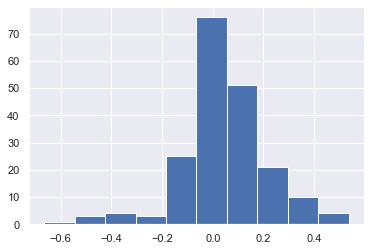

In [291]:
test_predict2=scaler.inverse_transform(test_predict)
test_predict2.shape
plt.hist(test_predict2)

(array([  1.,   3.,  12.,  45., 115.,  12.,   7.,   1.,   1.,   1.]),
 array([-2.70647488, -2.04731542, -1.38815595, -0.72899649, -0.06983702,
         0.58932244,  1.2484819 ,  1.90764137,  2.56680083,  3.22596029,
         3.88511976]),
 <a list of 10 Patch objects>)

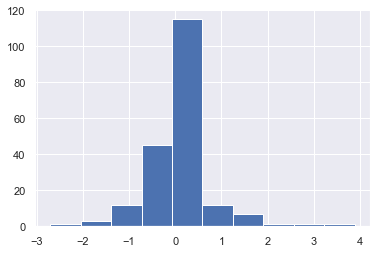

In [292]:
test_y2=scaler.inverse_transform(test_y)
test_y2.shape
plt.hist(test_y2)

In [328]:
def cal_the_return(testPredict,testY):
    compare=pd.DataFrame(testPredict)
    compare['testy']=testY
    # 测试集的实际收益率和测试集的预测收益率
    compare.columns=['predy','testy']
    compare.to_csv('compare.csv')
    accy = [1]
    accp = [[1]for i in range(6)]
    for row in compare.index:
        if row == 0:
            continue
        pred = compare['predy'].loc[row]
        real = compare['testy'].loc[row]
        accy.append(accy[row - 1] * (1 + real/100))
        for i in range(6):
            if pred > i*0.01:  # 如果预期收益率大于0.1%*i，则当日持有
                accp[i].append(accp[i][row - 1] * (1 + real/100))
            else:
                accp[i].append(accp[i][row - 1])
    compare['acc_y'] = accy
    for i in range(6):
        compare['acc_p'+str(i)] = accp[i]

    return compare
cal_the_return(test_predict2,test_y2)

,predy,testy,acc_y,acc_p0,acc_p1,acc_p2,acc_p3,acc_p4,acc_p5
0,0.240908,-0.050794,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-0.042244,-0.127666,0.998723,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,-0.023373,-0.136070,0.997364,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.191326,-0.080556,0.996561,0.999194,0.999194,0.999194,0.999194,0.999194,0.999194
4,-0.258085,-0.343854,0.993134,0.999194,0.999194,0.999194,0.999194,0.999194,0.999194
...,...,...,...,...,...,...,...,...,...
193,-0.118168,1.261120,1.182941,1.071137,1.055869,1.049389,1.053901,1.046285,1.047263
194,0.059862,-0.915733,1.172108,1.061328,1.046200,1.039780,1.044250,1.036704,1.037673
195,-0.179412,-1.995754,1.148716,1.061328,1.046200,1.039780,1.044250,1.036704,1.037673
196,0.176205,-0.297234,1.145302,1.058173,1.043090,1.036689,1.041146,1.033623,1.034589


In [384]:
def cal_the_return(testPredict,testY):
    # 测试集的实际收益率和测试集的预测收益率
    compare=pd.DataFrame({'pred_y':testPredict.T[0],'real_y':testY.T[0]})
    # 计算转债累计收益率
    accy=(compare['real_y']/100+1).cumprod()
    # 计算策略累计收益率
    accp=(pd.Series(compare['real_y'][compare['pred_y']>0],index=compare.index).fillna(0)/100+1).cumprod()

    compare['acc_y'] = accy # 累计收益率真实值
    compare['acc_p'] = accp # 预测累计收益率
    return compare
compare=cal_the_return(test_predict2,test_y2)
compare

,pred_y,real_y,acc_y,acc_p
0,0.240908,-0.050794,0.999492,0.999492
1,-0.042244,-0.127666,0.998216,0.999492
2,-0.023373,-0.136070,0.996858,0.999492
3,0.191326,-0.080556,0.996055,0.998687
4,-0.258085,-0.343854,0.992630,0.998687
...,...,...,...,...
193,-0.118168,1.261120,1.182340,1.070593
194,0.059862,-0.915733,1.171513,1.060789
195,-0.179412,-1.995754,1.148132,1.060789
196,0.176205,-0.297234,1.144720,1.057636


In [375]:
 compare['real_y'][compare['pred_y']>0]

0     -0.050794
3     -0.080556
14    -0.108227
27     0.560908
30     0.429231
         ...   
190    0.118783
192    0.039819
194   -0.915733
196   -0.297234
197    0.073834
Name: real_y, Length: 120, dtype: float64

In [374]:
(compare['pred_y']>0)

0       True
1      False
2      False
3       True
4      False
       ...  
193    False
194     True
195    False
196     True
197     True
Name: pred_y, Length: 198, dtype: bool

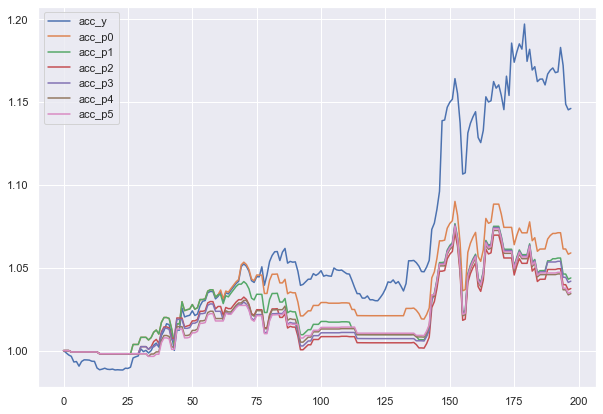

In [307]:
cal_the_return(test_predict2,test_y2).iloc[:,2:].plot(figsize=(10,7))

In [299]:
import math
trainScore = math.sqrt(mean_squared_error(train_y, trainPredict2))
print('Train Score: %.5f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_y, test_predict2))
print('Test Score: %.5f RMSE' % (testScore))

Train Score: 0.55919 RMSE
Test Score: 0.53865 RMSE


In [326]:
df.index[0:]


Index(['2017-09-18', '2017-09-19', '2017-09-20', '2017-09-21', '2017-09-22',
       '2017-09-25', '2017-09-26', '2017-09-27', '2017-09-28', '2017-09-29',
       ...
       '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-07', '2020-09-08',
       '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-14', '2020-09-15'],
      dtype='object', length=729)

In [387]:
from LSTM_pack import LSTM_model

LSTM_model(df['110031.SH'])

NameError: name 'test_scaler' is not defined

In [386]:
type(df['110031.SH'])

pandas.core.series.Series